In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. 加载数据集
# 这里使用自带的乳腺癌数据集作为示例
from sklearn.datasets import load_breast_cancer

## 1.读取数据，展示数据

In [122]:
p_data = pd.read_csv("p_data.csv")
p_data.head(1000)

,num,gender,age,G,S,ALB,TB,ALT,AST,GGT,...,lg.Ag,eAg,WBC,N,Hb,PLT,PTA,INR,APTT,AFP
0,1,1,44,4,1,40.0,41.4,281.0,58.0,109.0,...,1.61,1,5.5,3.00,141,125,92,1.05,39.0,7.76
1,2,0,38,3,1,46.0,13.1,319.0,214.0,29.0,...,3.42,1,3.8,1.80,118,199,NaN,0.97,35.9,2.76
2,3,1,41,1,0,45.0,16.7,41.0,34.0,90.0,...,3.27,1,4.4,3.10,144,267,132,0.87,30.0,7.62
3,4,1,20,2,0,40.0,16.4,115.0,46.0,43.0,...,4.73,1,9.3,4.29,152,206,NaN,0.93,37.1,1.24
4,5,0,22,2,0,44.0,21.0,88.0,54.0,17.0,...,4.14,1,7.4,4.90,151,275,110,0.95,32.1,1.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,1,32,1,0,44.2,21.9,55.9,39.1,16.4,...,4.41,1,4.6,2.80,156,154,91.3,1.12,31.3,2.08
332,333,0,38,1,0,35.5,14.9,11.2,16.2,9.2,...,2.85,0,5.2,3.30,109,141,106.52,1.01,30.9,3.04
333,334,0,47,1,1,46.0,8.5,24.9,31.4,21.3,...,0.81,1,6.1,2.90,134,197,94.57,1.10,44.8,1.47
334,335,1,33,1,1,34.5,51.9,584.7,440.1,197.3,...,3.13,1,5.8,2.30,147,175,84,1.16,43.4,56.14


## 补齐缺失数据

In [117]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder


# drop num and G column
p_data = pd.read_csv("p_data.csv")
p_data = p_data.drop(columns=['num'])
p_data = p_data.drop(columns=['G'])

# 补齐数据
# 有object数据，转换一下
p_data['PTA'] = pd.to_numeric(p_data['PTA'], errors='coerce')
# 使用KNNImputer填补缺失值
imputer = KNNImputer(n_neighbors=10)
data_imputed = pd.DataFrame(imputer.fit_transform(p_data), columns=p_data.columns)
data_imputed.head(1000)

# 分割数据集
X = data_imputed.drop(columns=['S'])
y = data_imputed['S']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [119]:


# 4. 训练随机森林模型
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

### 基础预测和评估模型

In [120]:
# 进行预测
y_pred = rf.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'test set Accuracy: {accuracy}')
print(f'test set Confusion Matrix:\n{conf_matrix}')
print(f'test set Classification Report:\n{class_report}')

# 进行预测
y_tpred = rf.predict(X_train)

# 评估模型
accuracy = accuracy_score(y_train, y_tpred)
conf_matrix = confusion_matrix(y_train, y_tpred)
class_report = classification_report(y_train, y_tpred)

print(f'training Accuracy: {accuracy}')
print(f'training set Confusion Matrix:\n{conf_matrix}')
print(f'training set Classification Report:\n{class_report}')

test set Accuracy: 0.6911764705882353
test set Confusion Matrix:
[[41  5]
 [16  6]]
test set Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.89      0.80        46
         1.0       0.55      0.27      0.36        22

    accuracy                           0.69        68
   macro avg       0.63      0.58      0.58        68
weighted avg       0.66      0.69      0.66        68

training Accuracy: 1.0
training set Confusion Matrix:
[[166   0]
 [  0 102]]
training set Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       166
         1.0       1.00      1.00      1.00       102

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



## 网格搜索

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'n_estimators': [5, 7, 10, 12, 15],
    'max_depth': [None, 2, 3, 4, 5, 8],
    'min_samples_split': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 创建随机森林分类器
rf = RandomForestClassifier()

# 进行网格搜索
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best Parameters:", grid_search.best_params_)

/Users/jinx/opt/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jinx/opt/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jinx/opt/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

Best Parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 7}


/Users/jinx/opt/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1800 fits failed out of a total of 9000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jinx/opt/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jinx/opt/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Users/jinx/opt/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/base.py", line 600, in _validat

In [42]:
print(grid_search.best_params_)

rf = RandomForestClassifier(
    **grid_search.best_params_
)
rf.fit(X_train, y_train)

# 进行预测
y_pred = rf.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'test set Accuracy: {accuracy}')
print(f'test set Confusion Matrix:\n{conf_matrix}')
print(f'test set Classification Report:\n{class_report}')

# 进行预测
y_tpred = rf.predict(X_train)

# 评估模型
accuracy = accuracy_score(y_train, y_tpred)
conf_matrix = confusion_matrix(y_train, y_tpred)
class_report = classification_report(y_train, y_tpred)

print(f'training Accuracy: {accuracy}')
print(f'training set Confusion Matrix:\n{conf_matrix}')
print(f'training set Classification Report:\n{class_report}')

{'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}
test set Accuracy: 0.6764705882352942
test set Confusion Matrix:
[[32  6]
 [16 14]]
test set Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.84      0.74        38
         1.0       0.70      0.47      0.56        30

    accuracy                           0.68        68
   macro avg       0.68      0.65      0.65        68
weighted avg       0.68      0.68      0.66        68

training Accuracy: 0.8097014925373134
training set Confusion Matrix:
[[168   6]
 [ 45  49]]
training set Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87       174
         1.0       0.89      0.52      0.66        94

    accuracy                           0.81       268
   macro avg       0.84      0.74      0.76       268
weighted avg       0.82      0.81      0.79       

## 交叉验证

In [55]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer


model = RandomForestClassifier(
    **grid_search.best_params_
)
# 使用k折交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf)

print(f"Cross-Validation Scores: {scores}")
print(f"Mean Score: {np.mean(scores)}")

Cross-Validation Scores: [0.64705882 0.7761194  0.82089552 0.62686567 0.71641791]
Mean Score: 0.7174714661984196


In [69]:
from sklearn.model_selection import StratifiedKFold


model = RandomForestClassifier(
    **grid_search.best_params_
)
# 使用分层抽样的k折交叉验证
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=77)
stratified_scores = cross_val_score(model, X, y, cv=skf)

print(f"Stratified Cross-Validation Scores: {stratified_scores}")
print(f"Mean Stratified Score: {np.mean(stratified_scores)}")

Stratified Cross-Validation Scores: [0.76470588 0.67647059 0.70588235 0.61764706 0.73529412 0.79411765
 0.66666667 0.78787879 0.78787879 0.75757576]
Mean Stratified Score: 0.7294117647058823


## svm模型

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer

# 3. 训练SVM模型
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train.values, y_train.values)

SVC(kernel='linear', random_state=42)

In [88]:
# 4. 进行预测
y_pred = svm_model.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'test set Accuracy: {accuracy}')
print(f'test set Confusion Matrix:\n{conf_matrix}')
print(f'test set Classification Report:\n{class_report}')

# 进行预测
y_tpred = svm_model.predict(X_train)

# 评估模型
accuracy = accuracy_score(y_train, y_tpred)
conf_matrix = confusion_matrix(y_train, y_tpred)
class_report = classification_report(y_train, y_tpred)

print(f'training Accuracy: {accuracy}')
print(f'training set Confusion Matrix:\n{conf_matrix}')
print(f'training set Classification Report:\n{class_report}')

test set Accuracy: 0.8382352941176471
test set Confusion Matrix:
[[42  4]
 [ 7 15]]
test set Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88        46
         1.0       0.79      0.68      0.73        22

    accuracy                           0.84        68
   macro avg       0.82      0.80      0.81        68
weighted avg       0.84      0.84      0.83        68

training Accuracy: 0.7947761194029851
training set Confusion Matrix:
[[147  19]
 [ 36  66]]
training set Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       166
         1.0       0.78      0.65      0.71       102

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



/Users/jinx/opt/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/jinx/opt/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


## 模型超参数

In [86]:
type(X_train.values)

numpy.ndarray

In [91]:
# 定义参数网格
param_grid = {
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly']
}

# 创建SVM分类器
svm_model = SVC()

# 进行网格搜索
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train.values, y_train.values)

# 输出最佳参数
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'kernel': 'linear'}


In [92]:
svm_model = SVC(
    **grid_search.best_params_
)
svm_model.fit(X_train, y_train)
# 进行预测
y_pred = svm_model.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'test set Accuracy: {accuracy}')
print(f'test set Confusion Matrix:\n{conf_matrix}')
print(f'test set Classification Report:\n{class_report}')

# 进行预测
y_tpred = svm_model.predict(X_train)

# 评估模型
accuracy = accuracy_score(y_train, y_tpred)
conf_matrix = confusion_matrix(y_train, y_tpred)
class_report = classification_report(y_train, y_tpred)

print(f'training Accuracy: {accuracy}')
print(f'training set Confusion Matrix:\n{conf_matrix}')
print(f'training set Classification Report:\n{class_report}')

test set Accuracy: 0.8382352941176471
test set Confusion Matrix:
[[42  4]
 [ 7 15]]
test set Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88        46
         1.0       0.79      0.68      0.73        22

    accuracy                           0.84        68
   macro avg       0.82      0.80      0.81        68
weighted avg       0.84      0.84      0.83        68

training Accuracy: 0.7947761194029851
training set Confusion Matrix:
[[147  19]
 [ 36  66]]
training set Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       166
         1.0       0.78      0.65      0.71       102

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



In [165]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder


# drop num and G column
p_data = pd.read_csv("p_data.csv")
# p_data = p_data.drop(columns=['num'])
# p_data = p_data.drop(columns=['G'])

# 补齐数据
# 有object数据，转换一下
p_data['PTA'] = pd.to_numeric(p_data['PTA'], errors='coerce')
p_data = p_data.dropna()
# # 使用KNNImputer填补缺失值
# imputer = KNNImputer(n_neighbors=10)
# data_imputed = pd.DataFrame(imputer.fit_transform(p_data), columns=p_data.columns)
# data_imputed.head(1000)

# 分割数据集
X = data_imputed.drop(columns=['S'])
# y = data_imputed['S']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
value_counts = y_train.value_counts()
plt.figure(figsize=(8, 6))
ax = value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.title('Category Counts in Column S')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)  # 设置x轴标签的旋转角度
plt.show()

### 没有采样

/Users/jinx/opt/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jinx/opt/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [22:47:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 83, number of negative: 152
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1022
[LightGBM] [Info] Number of data points in the train set: 235, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353191 -> initscore=-0.605040
[LightGBM] [Info] Start training from score -0.605040
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

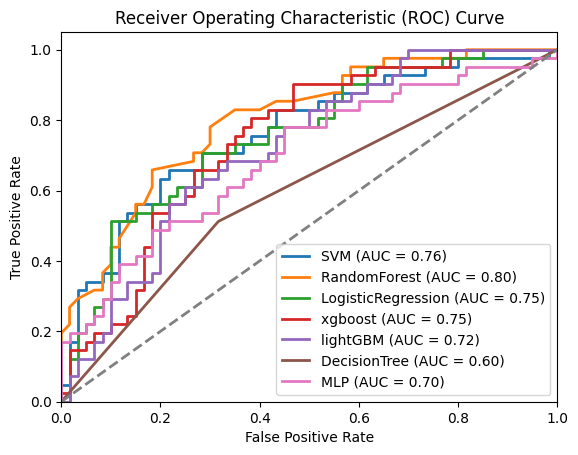

In [166]:
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
from scipy.interpolate import UnivariateSpline


# 3. 初始化模型
models = {
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'xgboost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42),
    'lightGBM': lgb.LGBMClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100, ),  # 设置隐藏层的神经元数量和层数
                          activation='relu',  # 激活函数为 ReLU
                          solver='adam',  # 优化器为 Adam
                          alpha=0.0001,  # L2正则化参数
                          max_iter=1000,  # 最大迭代次数
                          random_state=42),

}

plt.figure()

# 4. 训练模型并绘制ROC曲线
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]  # 获得预测为正类的概率
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {auc:.2f})')

# 5. 绘制对角线
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

# 6. 设置图形参数
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [107]:
tmp_models = models["xgboost"]


y_tpred = tmp_models.predict(X_train)
# 评估模型
accuracy = accuracy_score(y_train, y_tpred)
conf_matrix = confusion_matrix(y_train, y_tpred)
class_report = classification_report(y_train, y_tpred)

print(f'training Accuracy: {accuracy}')
print(f'training set Confusion Matrix:\n{conf_matrix}')
print(f'training set Classification Report:\n{class_report}')


y_pred = tmp_models.predict(X_test)
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'test set Accuracy: {accuracy}')
print(f'test set Confusion Matrix:\n{conf_matrix}')
print(f'test set Classification Report:\n{class_report}')


training Accuracy: 1.0
training set Confusion Matrix:
[[166   0]
 [  0 102]]
training set Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       166
         1.0       1.00      1.00      1.00       102

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

test set Accuracy: 0.7941176470588235
test set Confusion Matrix:
[[39  7]
 [ 7 15]]
test set Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        46
         1.0       0.68      0.68      0.68        22

    accuracy                           0.79        68
   macro avg       0.76      0.76      0.76        68
weighted avg       0.79      0.79      0.79        68



### 上采样

In [157]:
from imblearn import over_sampling
from scipy.interpolate import UnivariateSpline

In [140]:
X_train.shape, y_train.shape

((235, 21), (235,))

In [149]:
sp = over_sampling.ADASYN
sm = over_sampling.SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [150]:
X_res.shape, y_res.shape

((304, 21), (304,))

/Users/jinx/opt/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jinx/opt/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

[LightGBM] [Info] Number of positive: 152, number of negative: 152
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 304, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

error: (m>k) failed for hidden m: fpcurf0:m=3

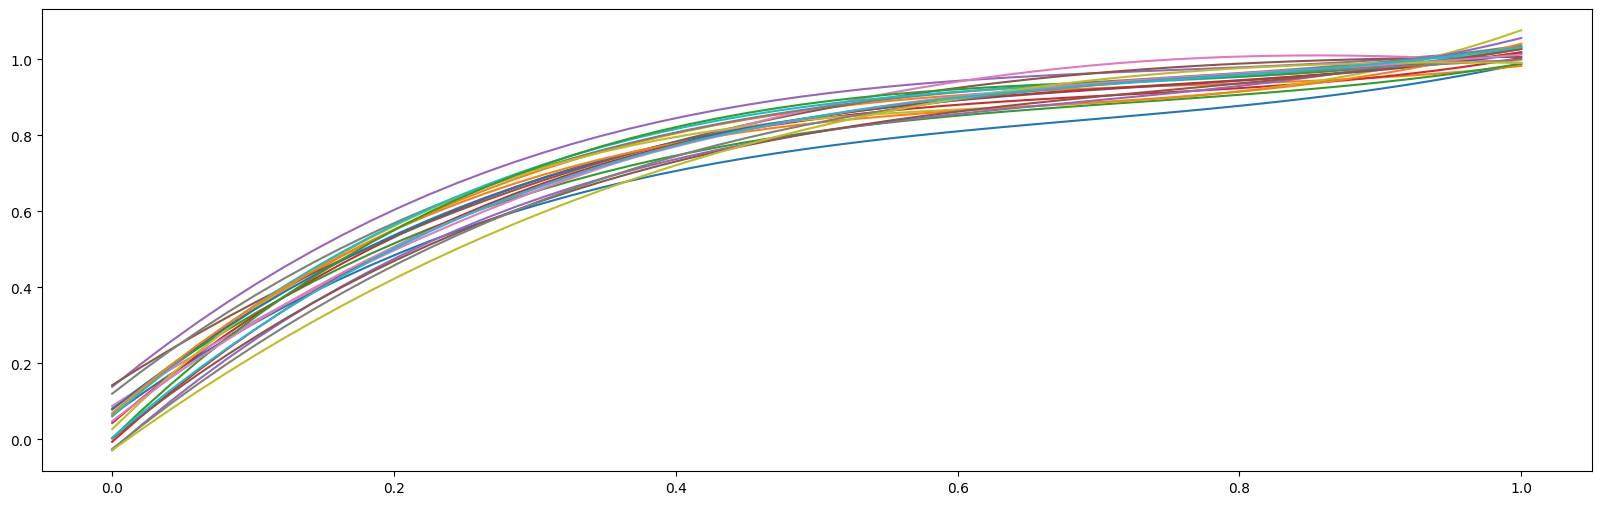

In [160]:
samplers = {
    "random": over_sampling.RandomOverSampler(random_state=42),
    "smote": over_sampling.SMOTE(random_state=42),
    "adasyn": over_sampling.ADASYN(random_state=42),
    "SVMSMOTE": over_sampling.SVMSMOTE(random_state=42),
}



models = {
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'xgboost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42),
    'lightGBM': lgb.LGBMClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100, ),  # 设置隐藏层的神经元数量和层数
                          activation='relu',  # 激活函数为 ReLU
                          solver='adam',  # 优化器为 Adam
                          alpha=0.0001,  # L2正则化参数
                          max_iter=2000,  # 最大迭代次数
                          random_state=42),
}

plt.figure(figsize=(20, 6))
is_interpolate = 0
# 4. 训练模型并绘制ROC曲线
for model_name, model in models.items():
    for sampler_name, sp in samplers.items():
        X_res, y_res = sp.fit_resample(X_train, y_train)
        model.fit(X_res, y_res)
        y_probs = model.predict_proba(X_test)[:, 1]  # 获得预测为正类的概率
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc = roc_auc_score(y_test, y_probs)

        if is_interpolate:
            # 计算 ROC 曲线和 AUC
            fpr, tpr, _ = roc_curve(y_test, y_probs)
            # 使用样条插值进行平滑
            spline = UnivariateSpline(fpr, tpr)
            fpr = np.linspace(fpr.min(), fpr.max(), 50)
            tpr = spline(fpr)

        plt.plot(fpr, tpr, lw=1.5, label=f'{model_name} + {sampler_name} (AUC = {auc:.2f})')

# 5. 绘制对角线
plt.plot([0, 1], [0, 1], color='grey', lw=1.5, linestyle='--')

# 6. 设置图形参数
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()